# Import and Load Datasets

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [132]:
url = "https://raw.githubusercontent.com/TuhinPatra633/Career-Prediction-Using-Machine-Learning/refs/heads/main/Data/CareerMapping.csv"
df = pd.read_csv(url)

# EDA

In [133]:
df.head()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,...,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,Role
0,6,4,4,4,4,4,4,4,4,4,...,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746,Database Administrator
1,6,5,4,4,4,4,4,4,4,4,...,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424,Database Administrator
2,6,1,4,4,4,4,4,4,4,4,...,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024,Database Administrator
3,6,0,4,4,4,4,4,4,4,4,...,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119,Database Administrator
4,6,3,4,4,4,4,4,4,4,4,...,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287,Database Administrator


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Database Fundamentals            9179 non-null   int64  
 1   Computer Architecture            9179 non-null   int64  
 2   Distributed Computing Systems    9179 non-null   int64  
 3   Cyber Security                   9179 non-null   int64  
 4   Networking                       9179 non-null   int64  
 5   Software Development             9179 non-null   int64  
 6   Programming Skills               9179 non-null   int64  
 7   Project Management               9179 non-null   int64  
 8   Computer Forensics Fundamentals  9179 non-null   int64  
 9   Technical Communication          9179 non-null   int64  
 10  AI ML                            9179 non-null   int64  
 11  Software Engineering             9179 non-null   int64  
 12  Business Analysis   

In [135]:
df.describe()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,...,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence
count,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,...,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000
mean,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,...,0.734488,0.438438,0.400094,0.150369,0.616173,0.104990,0.383124,0.164839,0.314053,0.235750
std,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,...,0.078523,0.122408,0.142363,0.096312,0.097118,0.063861,0.069740,0.057645,0.062839,0.057746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.563646,0.108561,0.102254,0.017733,0.391125,0.012488,0.147039,0.062674,0.087559,0.059278
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.685635,0.337844,0.283624,0.073822,0.554618,0.054775,0.341044,0.123395,0.274069,0.201112
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.727765,0.448789,0.378902,0.116550,0.617598,0.092798,0.382971,0.156598,0.311400,0.233827
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,0.785837,0.522801,0.525272,0.195782,0.672837,0.129722,0.430398,0.189111,0.353478,0.274723
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,0.900797,0.734466,0.745477,0.538450,0.889522,0.390480,0.655578,0.427479,0.594727,0.508034


In [136]:
df.isnull().sum()

Database Fundamentals              0
Computer Architecture              0
Distributed Computing Systems      0
Cyber Security                     0
Networking                         0
Software Development               0
Programming Skills                 0
Project Management                 0
Computer Forensics Fundamentals    0
Technical Communication            0
AI ML                              0
Software Engineering               0
Business Analysis                  0
Communication skills               0
Data Science                       0
Troubleshooting skills             0
Graphics Designing                 0
Openness                           0
Conscientousness                   0
Extraversion                       0
Agreeableness                      0
Emotional_Range                    0
Conversation                       0
Openness to Change                 0
Hedonism                           0
Self-enhancement                   0
Self-transcendence                 0
R

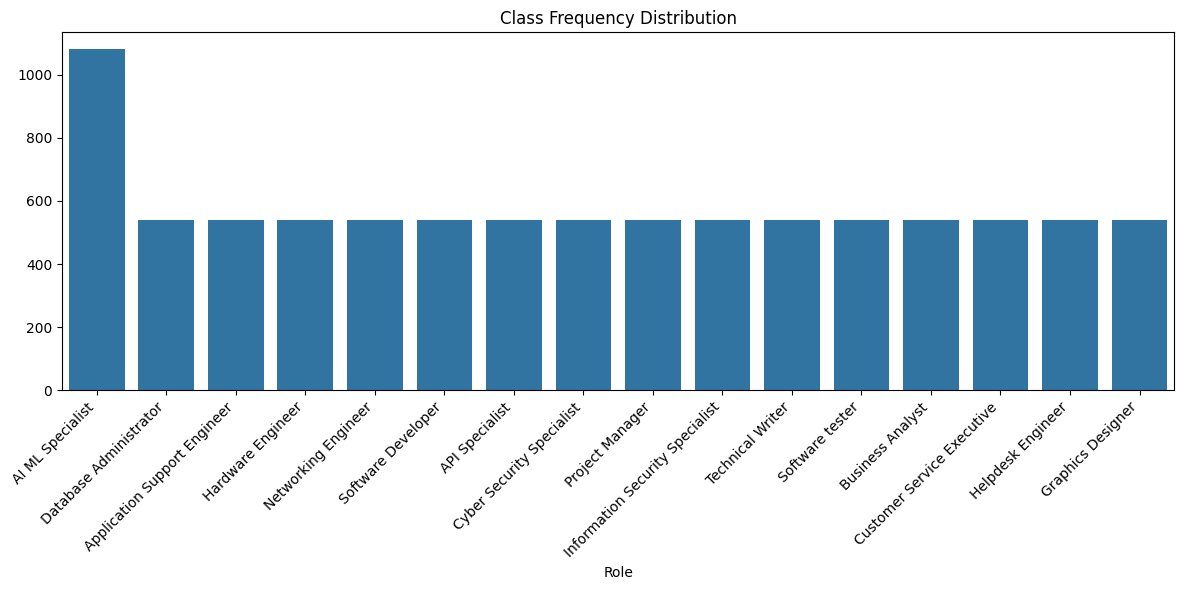

In [137]:
# Class Frequency
class_counts = df['Role'].value_counts()

plt.figure(figsize=(12, 6))  # Adjust width if needed
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Frequency Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()  # Prevent clipping
plt.show()


# Preprocessing

In [138]:
threshold = 100
# Filter out classes with fewer than the threshold number of samples
df = df[df['Role'].map(df['Role'].value_counts()) >= threshold]

In [139]:
df_career = df.pop('Role')
df['Role'] = df_career

In [140]:
def encode_df(df):
    # make a clean copy so we never touch the caller’s DataFrame
    df = df.copy(deep=True)

    # Encode numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # Encode categoricals
    label_encoders = {}
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    return df, label_encoders, scaler

df_encoded, label_encoders, scale = encode_df(df)

Text(0.5, 1.0, 'Correlation Matrix')

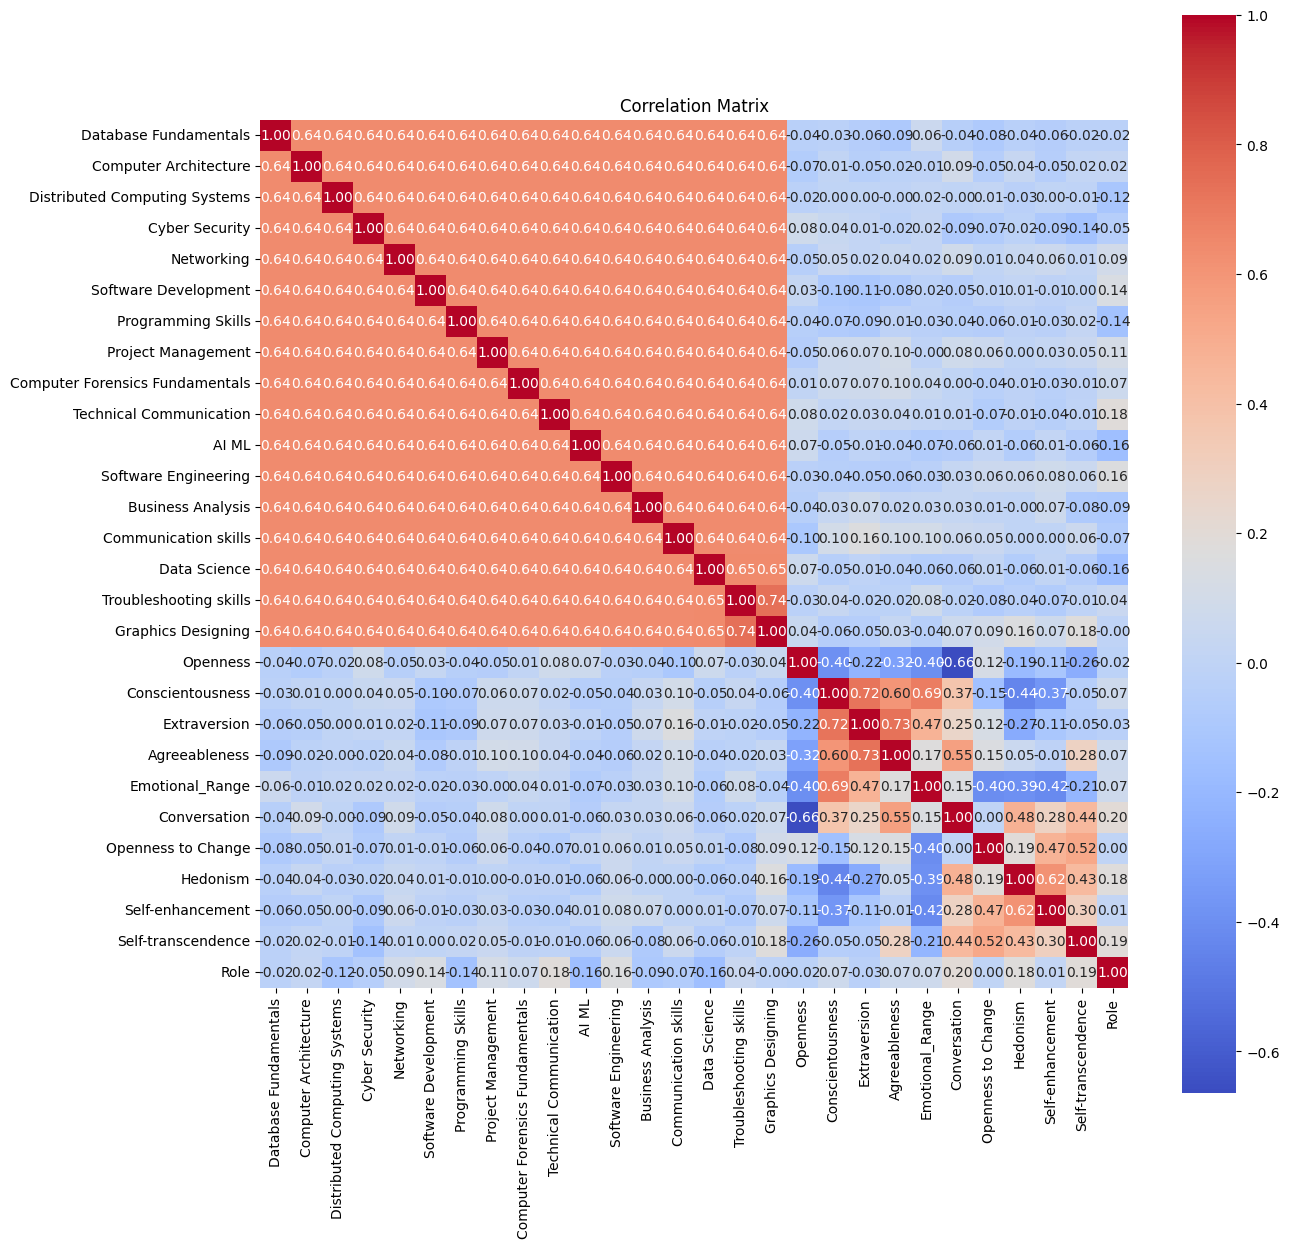

In [141]:
# Corellation matrix
plt.figure(figsize=(14, 14))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

In [142]:
# Drop columns with less than 10% correlation with the target
correlation_threshold = 0.1
correlation_matrix = df_encoded.corr()
low_correlation_cols = correlation_matrix.index[abs(correlation_matrix['Role']) < correlation_threshold].tolist()
df.drop(columns=low_correlation_cols, inplace=True)

In [143]:
df, label_encoders, scaler = encode_df(df)

In [144]:
X = df.drop(columns=['Role'])
y = df['Role']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [145]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Find minimum samples per class in training set
min_class_count = min(Counter(y_train).values())
k_neighbors = min(5, min_class_count - 1)  # Safe fallback for SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train, y_train = smote.fit_resample(X_train, y_train)

c:\Users\valdr\AppData\Roaming\Python\environments\deep_learning\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [146]:
print(X_train.head())
print(y_train.head())

   Distributed Computing Systems  Software Development  Programming Skills  \
0                       0.699367              0.699367            0.699367   
1                      -0.921990             -0.921990           -0.921990   
2                       0.158915              0.158915            0.158915   
3                      -1.462442              1.780272           -1.462442   
4                       1.239820              1.239820            1.239820   

   Project Management  Technical Communication     AI ML  \
0            0.699367                 0.699367  0.699367   
1           -0.921990                -0.921990 -0.921990   
2            0.158915                 0.158915  0.158915   
3           -1.462442                -1.462442 -1.462442   
4            1.239820                -0.921990  1.239820   

   Software Engineering  Data Science  Conversation  Hedonism  \
0              0.699367      0.699367     -1.044003 -0.952279   
1              1.780272     -0.921990   

# Training

In [147]:
X_train_sub, X_eval, y_train_sub, y_eval = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [148]:
# Define the early stopping callback
early_stop = EarlyStopping(rounds=10, metric_name='mlogloss')

# Set up the XGBoost model with early stopping callback
params = {
    'objective': 'multi:softprob',
    'num_class': len(y.unique()),
    'eval_metric': 'mlogloss',
    'callbacks': [early_stop],
    'n_estimators': 500,
    'max_depth': 2,
    'n_jobs': -1,
    'learning_rate': 0.01
}

# Train the model
model = XGBClassifier(**params)
model.fit(X_train_sub, y_train_sub, eval_set=[(X_train_sub, y_train_sub), (X_eval, y_eval)], verbose=True)

[0]	validation_0-mlogloss:2.72631	validation_1-mlogloss:2.72683
[1]	validation_0-mlogloss:2.68310	validation_1-mlogloss:2.68413
[2]	validation_0-mlogloss:2.64253	validation_1-mlogloss:2.64419
[3]	validation_0-mlogloss:2.60430	validation_1-mlogloss:2.60656
[4]	validation_0-mlogloss:2.56814	validation_1-mlogloss:2.57096
[5]	validation_0-mlogloss:2.53383	validation_1-mlogloss:2.53718
[6]	validation_0-mlogloss:2.50117	validation_1-mlogloss:2.50505
[7]	validation_0-mlogloss:2.47001	validation_1-mlogloss:2.47438
[8]	validation_0-mlogloss:2.44022	validation_1-mlogloss:2.44507
[9]	validation_0-mlogloss:2.41168	validation_1-mlogloss:2.41683
[10]	validation_0-mlogloss:2.38426	validation_1-mlogloss:2.38981
[11]	validation_0-mlogloss:2.35790	validation_1-mlogloss:2.36387
[12]	validation_0-mlogloss:2.33251	validation_1-mlogloss:2.33884
[13]	validation_0-mlogloss:2.30801	validation_1-mlogloss:2.31470
[14]	validation_0-mlogloss:2.28435	validation_1-mlogloss:2.29139
[15]	validation_0-mlogloss:2.26147	

XGBClassifier(base_score=None, booster=None,
              callbacks=[<xgboost.callback.EarlyStopping object at 0x000002DCF0FA9790>],
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_class=16, num_parallel_tree=None, ...)

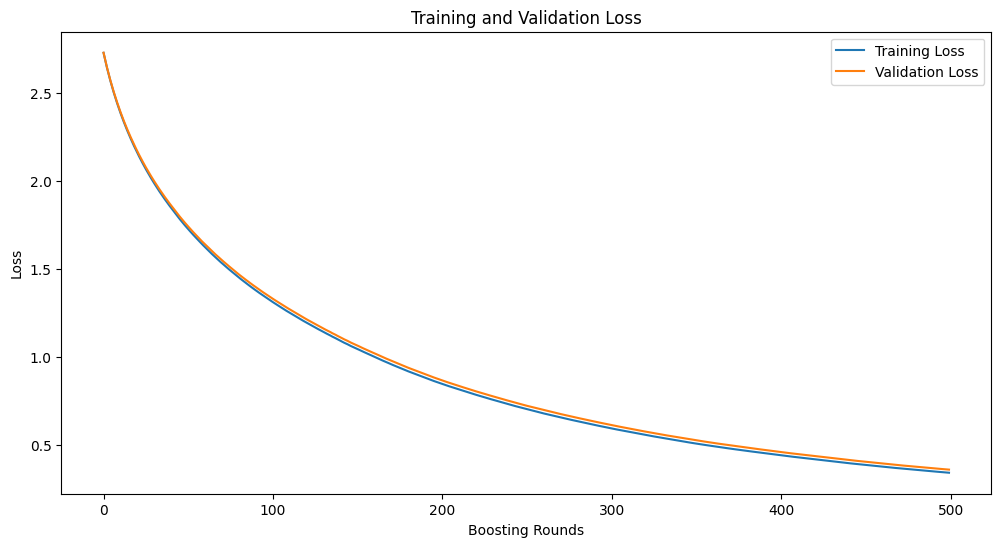

In [149]:
# Plot loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(model.evals_result()['validation_0']['mlogloss'], label='Training Loss')
plt.plot(model.evals_result()['validation_1']['mlogloss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [150]:
y_pred = model.predict(X_test)
y_test_str = label_encoders['Role'].inverse_transform(y_test)
y_pred_str = label_encoders['Role'].inverse_transform(y_pred)

accuracy = accuracy_score(y_test_str, y_pred_str)
report = classification_report(y_test_str, y_pred_str)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Accuracy: 0.9785766158315178
Classification Report:
                                  precision    recall  f1-score   support

               AI ML Specialist       1.00      1.00      1.00       322
                 API Specialist       1.00      1.00      1.00       155
   Application Support Engineer       1.00      1.00      1.00       182
               Business Analyst       1.00      0.86      0.92       163
     Customer Service Executive       1.00      1.00      1.00       151
      Cyber Security Specialist       1.00      1.00      1.00       148
         Database Administrator       0.95      1.00      0.97       175
              Graphics Designer       0.94      1.00      0.97       149
              Hardware Engineer       1.00      1.00      1.00       158
              Helpdesk Engineer       0.86      1.00      0.92       151
Information Security Specialist       1.00      1.00      1.00       162
            Networking Engineer       0.89      0.77      0.83  

In [151]:
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)
    
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Flask

In [1]:
from flask import Flask, render_template, request
import joblib
from threading import Thread
import pickle
import pandas as pd

In [2]:
model = joblib.load('xgb_model.pkl')
encoder = pickle.load(open("label_encoders.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

In [3]:
app = Flask(__name__)

@app.route('/', methods=['GET'])
def index():
    return render_template("index.html")

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get form inputs with proper error handling
        Distributed_Computing_Systems = request.form.get('distributed_computing_systems')
        Software_Development = request.form.get('software_development')  # Fixed key name
        Programming_Skills = request.form.get('programming_skills')
        Project_Management = request.form.get('project_management')
        Technical_Communication = request.form.get('technical_communication')
        AI_MaLe = request.form.get('ai_ml')
        Software_Engineering = request.form.get('software_engineering')
        Data_Science = request.form.get('data_science')
        Conversation = request.form.get('conversation')
        Hedonism = request.form.get('hedonism')
        transcendence = request.form.get('transcendence')
        
        # Validate that all required fields are present
        if not all([Distributed_Computing_Systems, Software_Development, Programming_Skills, Project_Management, Technical_Communication, AI_MaLe, Software_Engineering, Data_Science, Conversation, Hedonism, transcendence]):
            return render_template("index.html", error="Please fill in all required fields")
        
        # Convert to appropriate types
        try:
            Distributed_Computing_Systems = int(Distributed_Computing_Systems)
            Software_Development = int(Software_Development)
            Programming_Skills = int(Programming_Skills)
            Project_Management = int(Project_Management)
            Technical_Communication = int(Technical_Communication)
            AI_MaLe = int(AI_MaLe)
            Software_Engineering = int(Software_Engineering)
            Data_Science = int(Data_Science)
            Conversation = float(Conversation)
            Hedonism = float(Hedonism)
            transcendence = float(transcendence)
        except ValueError:
            return render_template("index.html", error="Invalid input format")

        # Create a DataFrame with the correct column names
        input_data = pd.DataFrame([[Distributed_Computing_Systems, Software_Development, Programming_Skills, Project_Management,
                                   Technical_Communication, AI_MaLe, Software_Engineering, Data_Science,
                                   Conversation, Hedonism, transcendence]],
                          columns=['Distributed Computing Systems', 'Software Development', 'Programming Skills',
                                   'Project Management', 'Technical Communication', 'AI ML', 'Software Engineering', 'Data Science',
                                   'Conversation', 'Hedonism', 'Self-transcendence'])
        
        print(input_data)  # For debugging

        # Encode numerical features
        numerical_cols = input_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
        input_data[numerical_cols] = scaler.transform(input_data[numerical_cols])

        # Encode categorical features
        # for col in input_data.columns:
        #     if col in encoder and input_data[col].dtype == 'object':
        #         le = encoder[col]
        #         try:
        #             input_data[col] = le.transform(input_data[col])
        #         except ValueError as e:
        #             # Handle unseen labels
        #             return render_template("index.html", error=f"Unknown value for {col}: {input_data[col].iloc[0]}")

        # Predict
        prediction = model.predict(input_data)[0]
        
        # Get the career name
        career_prediction = encoder['Role'].inverse_transform([prediction])[0]

        return render_template("index.html", prediction=career_prediction)
    
    except Exception as e:
        print(f"Error: {str(e)}")  # For debugging
        return render_template("index.html", error="An error occurred during prediction")

In [4]:
def run_app():
    app.run(port=5000, debug=False, use_reloader=False)

Thread(target=run_app).start()

 * Serving Flask app '__main__'


 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Sep/2025 08:03:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2025 08:03:56] "GET /favicon.ico HTTP/1.1" 404 -


In [5]:
Distributed_Computing_Systems = 4
Software_Development = 0
Programming_Skills = 0
Project_Management = 0
Technical_Communication = 0
AI_MaLe = 0
Software_Engineering = 0
Data_Science = 0
Conversation = 0
Hedonism = 0
transcendence = 0

# Convert to appropriate types
Distributed_Computing_Systems = int(Distributed_Computing_Systems)
Software_Development = int(Software_Development)
Programming_Skills = int(Programming_Skills)
Project_Management = int(Project_Management)
Technical_Communication = int(Technical_Communication)
AI_MaLe = int(AI_MaLe)
Software_Engineering = int(Software_Engineering)
Data_Science = int(Data_Science)
Conversation = float(Conversation)
Hedonism = float(Hedonism)
transcendence = float(transcendence)

# Create a DataFrame with the correct column names
input_data = pd.DataFrame([[Distributed_Computing_Systems, Software_Development, Programming_Skills, Project_Management,
                           Technical_Communication, AI_MaLe, Software_Engineering, Data_Science,
                           Conversation, Hedonism, transcendence]],
                  columns=['Distributed Computing Systems', 'Software Development', 'Programming Skills',
                           'Project Management', 'Technical Communication', 'AI ML', 'Software Engineering', 'Data Science',
                           'Conversation', 'Hedonism', 'Self-transcendence'])


print(input_data.head())  # For debugging
# Encode numerical features
numerical_cols = input_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
input_data[numerical_cols] = scaler.transform(input_data[numerical_cols])
print("="*100)
print(input_data.head())  # For debugging

# Encode categorical features
# for col in input_data.columns:
#     if col in encoder and input_data[col].dtype == 'object':
#         le = encoder[col]
#         try:
#             input_data[col] = le.transform(input_data[col])
#         except ValueError as e:
#             # Handle unseen labels
#             return render_template("index.html", error=f"Unknown value for {col}: {input_data[col].iloc[0]}")
# Predict
prediction = model.predict(input_data)[0]

# Get the career name
career_prediction = encoder['Role'].inverse_transform([prediction])[0]
print(f"Predicted Career: {career_prediction}")

   Distributed Computing Systems  Software Development  Programming Skills  \
0                              4                     0                   0   

   Project Management  Technical Communication  AI ML  Software Engineering  \
0                   0                        0      0                     0   

   Data Science  Conversation  Hedonism  Self-transcendence  
0             0           0.0       0.0                 0.0  
   Distributed Computing Systems  Software Development  Programming Skills  \
0                       0.699367             -1.462442           -1.462442   

   Project Management  Technical Communication     AI ML  \
0           -1.462442                -1.462442 -1.462442   

   Software Engineering  Data Science  Conversation  Hedonism  \
0             -1.462442     -1.462442     -1.644129 -2.859726   

   Self-transcendence  
0           -4.082745  
Predicted Career: Cyber Security Specialist
